In [1]:
import pickle
import unittest
import numpy as np
from mlp import *
from numpy.testing import assert_allclose
from tqdm import tqdm
seed = 10417617
TOLERANCE = 1e-5
np.random.seed(seed)

# change this to where you downloaded the file,
# usually ends with 'cifar10-subset.pkl'
CIFAR_FILENAME = "../cifar10-subset.pkl"
with open(CIFAR_FILENAME, "rb") as f:
    data = pickle.load(f)

# preprocess
trainX = data["trainX"] / 255.0
trainy = labels2onehot(data["trainy"])
testX = data["testX"] / 255.0
testy = labels2onehot(data["testy"])

# fixed parameters
epoch = 50
batch_size = 128
lr = 0.001
mm = 0.9

# data loader
def data_loader(X, y, batch_size, shuffle=True):
    num_samples = X.shape[0]
    indices = np.arange(num_samples) # new indeces
    loader = []

    if shuffle:
        np.random.shuffle(indices)
        
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx] # get indeces in each batches
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        loader.append((X_batch, y_batch))
    
    return loader
    

In [2]:
# q 5.2.1
indim = trainX.shape[1]
outdim = 10
train_loader = data_loader(trainX, trainy, batch_size)
test_loader = data_loader(testX, testy, batch_size, shuffle=False)

model522 = SingleLayerMLP(indim, outdim, hiddenlayer=800, alpha=mm, lr=lr)
cls = SoftmaxCrossEntropyLoss()
n_train = trainX.shape[0]
n_test = testX.shape[0]

# collect data
train_losses = []
test_losses = []
train_accs = []
test_accs = []   

for i in tqdm(range(epoch)):
    
    train_loss = 0
    train_acc = 0
    for X_batch, y_batch in train_loader:
        # forward
        y_pred = model522.forward(X_batch)
        train_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        train_acc += cls.getAccu() * y_batch.shape[0]
        # backward
        out = cls.backward()
        model521.backward(out)
        # update
        model521.step()
        # zero grad
        model521.zerograd()
    train_loss = train_loss / n_train
    train_acc = train_acc / n_train
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    # print(cls.getAccu())
    
    test_loss = 0
    test_acc = 0
    for X_batch, y_batch in test_loader:
        # forward
        y_pred = model521.forward(X_batch, train=False)
        test_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        test_acc += cls.getAccu() * y_batch.shape[0]
    test_loss = test_loss / n_test
    test_acc = test_acc / n_test
    test_losses.append(test_loss)
    test_accs.append(test_acc)  

#     model521.train(trainX, trainy, batch_size)
#     print("Epoch", i, "Train accuracy:", model521.accuracy(trainX, trainy))


40


100%|██████████| 50/50 [01:21<00:00,  1.64s/it]


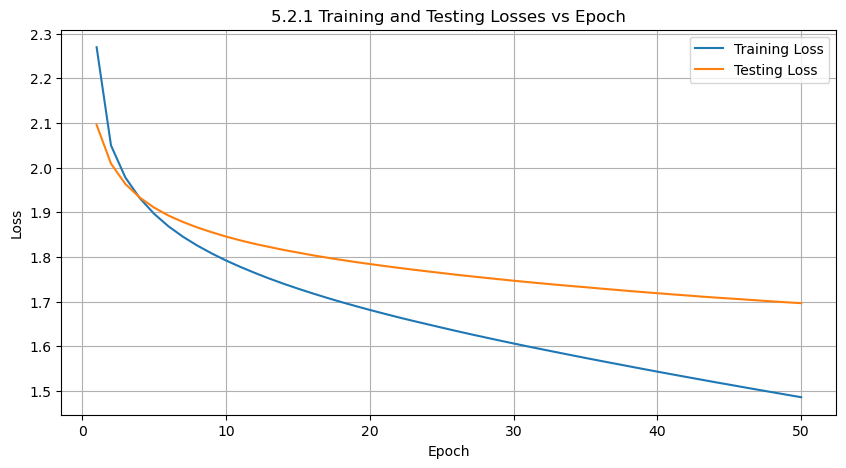

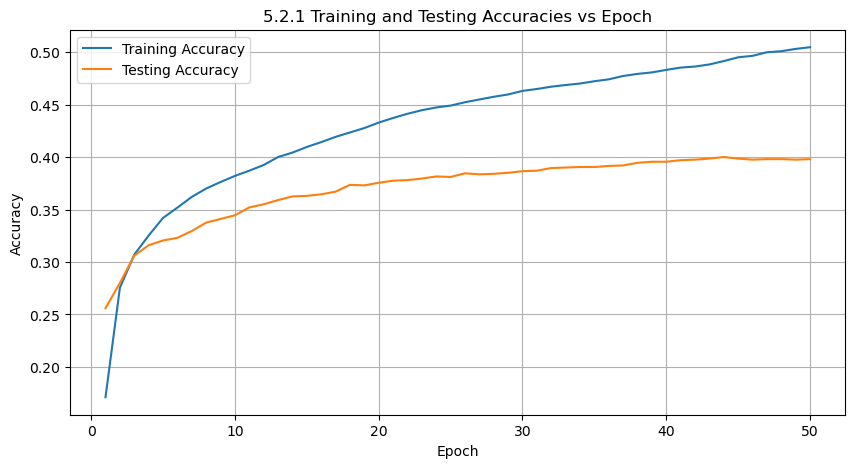

In [4]:
import matplotlib.pyplot as plt


# Plot for losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), train_losses, label='Training Loss')
plt.plot(range(1, epoch + 1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('5.2.1 Training and Testing Losses vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot for accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), train_accs, label='Training Accuracy')
plt.plot(range(1, epoch + 1), test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('5.2.1 Training and Testing Accuracies vs Epoch')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# sanity check total random loss
sol = np.zeros((1,10))
sol[0,0]=1
att = np.ones((1,10))*.1
loss =cls.forward(att, sol)
loss

2.302585091994046

In [14]:
# q 5.2.2
indim = trainX.shape[1]
outdim = 10
train_loader = data_loader(trainX, trainy, batch_size)
test_loader = data_loader(testX, testy, batch_size, shuffle=False)

model522 = TwoLayerMLP(indim, outdim, hiddenlayers=[800,800], alpha=mm, lr=lr)
cls = SoftmaxCrossEntropyLoss()
n_train = trainX.shape[0]
n_test = testX.shape[0]

# collect data
train_losses522 = []
test_losses522 = []
train_accs522 = []
test_accs522 = []   

for i in tqdm(range(epoch)):
    
    train_loss = 0
    train_acc = 0
    for X_batch, y_batch in train_loader:
        # forward
        y_pred = model522.forward(X_batch)
        train_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        train_acc += cls.getAccu() * y_batch.shape[0]
        # backward
        out = cls.backward()
        model522.backward(out)
        # update
        model522.step()
        # zero grad
        model522.zerograd()
    train_loss = train_loss / n_train
    train_acc = train_acc / n_train
    train_losses522.append(train_loss)
    train_accs522.append(train_acc)
    # print(cls.getAccu())
    
    test_loss = 0
    test_acc = 0
    for X_batch, y_batch in test_loader:
        # forward
        y_pred = model522.forward(X_batch, train=False)
        test_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        test_acc += cls.getAccu() * y_batch.shape[0]
    test_loss = test_loss / n_test
    test_acc = test_acc / n_test
    test_losses522.append(test_loss)
    test_accs522.append(test_acc)  

#     model522.train(trainX, trainy, batch_size)
#     print("Epoch", i, "Train accuracy:", model521.accuracy(trainX, trainy))


100%|██████████| 50/50 [01:50<00:00,  2.20s/it]


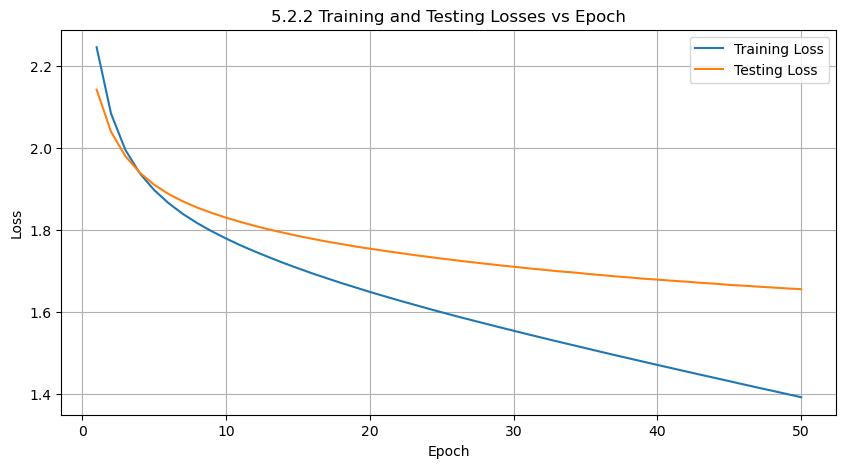

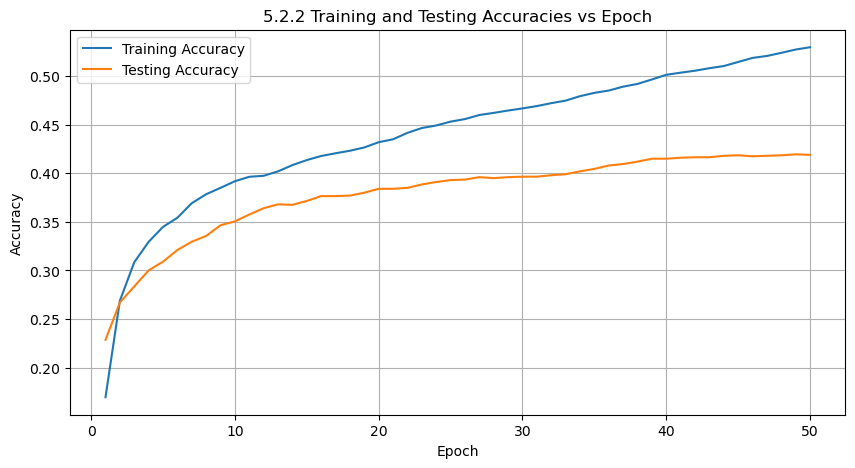

In [15]:
# Plot for losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), train_losses522, label='Training Loss')
plt.plot(range(1, epoch + 1), test_losses522, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('5.2.2 Training and Testing Losses vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot for accuracies
plt.figure(figsize=(10, 5))
plt.plot(range(1, epoch + 1), train_accs522, label='Training Accuracy')
plt.plot(range(1, epoch + 1), test_accs522, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('5.2.2 Training and Testing Accuracies vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print(min(train_losses522), min(test_losses522))
print(max(train_accs522), max(test_accs522))

1.3913254420198082 1.6552448269908036
0.5298 0.4195


In [ ]:
# q 5.2.3
indim = trainX.shape[1]
outdim = 10
train_loader = data_loader(trainX, trainy, batch_size)
test_loader = data_loader(testX, testy, batch_size, shuffle=False)

model52 = SingleLayerMLP(indim, outdim, hiddenlayer=800, alpha=mm, lr=lr)
cls = SoftmaxCrossEntropyLoss()
n_train = trainX.shape[0]
n_test = testX.shape[0]

# collect data
train_losses522 = []
test_losses522 = []
train_accs522 = []
test_accs522 = []   

for i in tqdm(range(epoch)):
    
    train_loss = 0
    train_acc = 0
    for X_batch, y_batch in train_loader:
        # forward
        y_pred = model522.forward(X_batch)
        train_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        train_acc += cls.getAccu() * y_batch.shape[0]
        # backward
        out = cls.backward()
        model522.backward(out)
        # update
        model522.step()
        # zero grad
        model522.zerograd()
    train_loss = train_loss / n_train
    train_acc = train_acc / n_train
    train_losses522.append(train_loss)
    train_accs522.append(train_acc)
    # print(cls.getAccu())
    
    test_loss = 0
    test_acc = 0
    for X_batch, y_batch in test_loader:
        # forward
        y_pred = model522.forward(X_batch, train=False)
        test_loss += cls.forward(y_pred, y_batch) * y_batch.shape[0]
        test_acc += cls.getAccu() * y_batch.shape[0]
    test_loss = test_loss / n_test
    test_acc = test_acc / n_test
    test_losses522.append(test_loss)
    test_accs522.append(test_acc)  

#     model522.train(trainX, trainy, batch_size)
#     print("Epoch", i, "Train accuracy:", model521.accuracy(trainX, trainy))
